In [2]:
import numpy as np
import matplotlib.pyplot as plt

from fourier_utils import fourier_transform_point_function, inverse_transform, Complex

C:\Users\niksm\Documents\CodeForUni\venvs\transformer_invariants\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Argument shifted: \n dual domain')

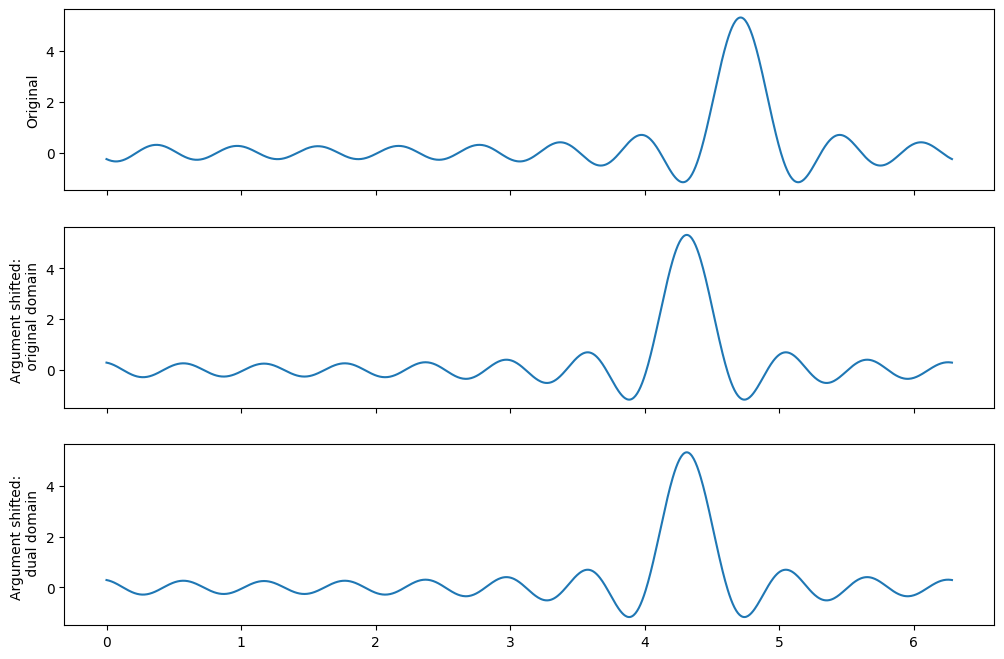

In [3]:
fig, ax = plt.subplots(3, figsize=[12,8], sharex=True)

# adjust the main plot to make room for the sliders
xs = np.linspace(0, 2*np.pi, 1000)
N = 10
m = 4

init_r, init_theta = 5.0, np.pi/2
offset_theta = 1/N*m # shift has to be k-dependent or you are mixing groups

# Plot the original function
z_orig = Complex(init_r, init_theta)
z_hat_orig = fourier_transform_point_function(z_orig, N)
z_hat_hat_orig = inverse_transform(z_hat_orig)

ax[0].plot(xs, z_hat_hat_orig(xs))
ax[0].set_ylabel('Original')

# Perform the shift in the original domain.

z_shift_in = Complex(init_r, init_theta + offset_theta)
z_hat_shift_in = fourier_transform_point_function(z_shift_in, N)
z_hat_hat_in = inverse_transform(z_hat_shift_in)

ax[1].plot(xs, z_hat_hat_in(xs))
ax[1].set_ylabel('Argument shifted: \n original domain')

# Perform the shift in the dual domain.
z_hat_shifted_out = z_hat_orig.copy()
shifter = np.exp(-1j*offset_theta*z_hat_shifted_out[:, 0]) # Where does this 2 come from??
z_hat_shifted_out[:, 1] *= shifter

z_hat_hat_shifted_out = inverse_transform(z_hat_shifted_out)
ax[2].plot(xs, z_hat_hat_shifted_out(xs))
ax[2].set_ylabel('Argument shifted: \n dual domain')